Harshal Singh
autoencoder_mnist_digit datset compression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from keras.layers import Conv2D, Input, Dense, Dropout, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist,fashion_mnist

In [ ]:
(train, _), (test, _) =mnist.load_data()

In [ ]:

train.shape ,test.shape


((60000, 28, 28), (10000, 28, 28))

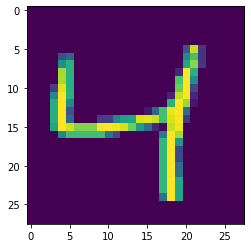

In [ ]:

plt.imshow(train[2])

In [ ]:
train[2].shape

(28, 28)

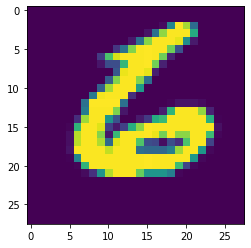

In [ ]:
plt.imshow(test[9999])

In [ ]:
train = train.reshape(-1,28,28,1)/255

test = test.reshape([-1,28,28,1])/255

In [ ]:


train.shape,test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:

train[2].shape

(28, 28, 1)

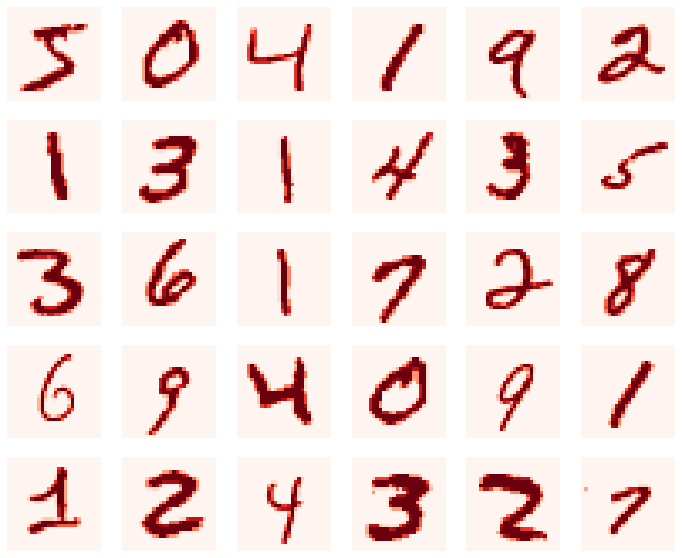

In [ ]:
rows = 5 
cols = 6 
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) 
    plt.imshow(train[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_original.png")

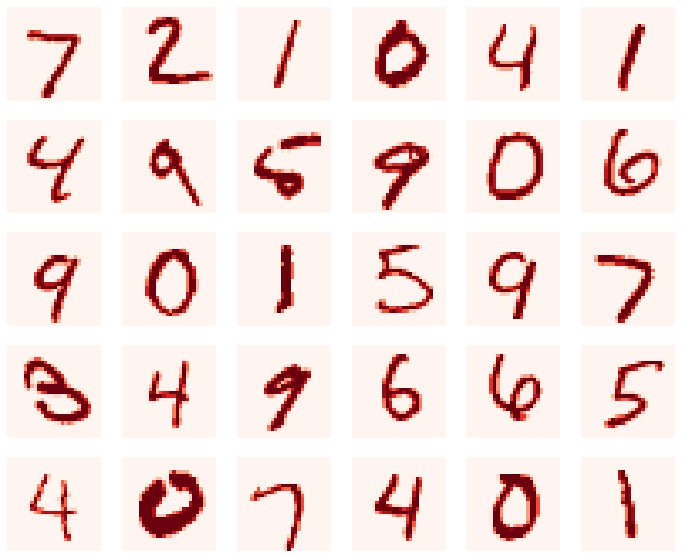

In [ ]:
rows = 5 
cols = 6 
subplot_size = 2
f = plt.figure(figsize=(subplot_size*cols, subplot_size*rows)) 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) 
    plt.imshow(test[i].reshape([28,28]),cmap="Reds") 
    plt.axis("off")
plt.savefig("digits_original.png")

In [ ]:

inputs = Input(shape=(28,28,1))
x = Conv2D(128, (3), activation='relu', padding='same')(inputs)  #(3,3) can be written as 3
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
x = Conv2D(4, 3, activation='relu', padding='same')(x)
encoded = Conv2D(4, 3, activation='relu', padding='same')(x)

In [ ]:
x = Conv2D(4, 3, activation='relu', padding='same')(encoded)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = UpSampling2D()(x)
x = Dropout(0.3)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 32)        18464     
                                                           

In [ ]:
epochs = 20
batch_size=256
history=autoencoder.fit(train,train,epochs=epochs,batch_size=batch_size,shuffle=True,validation_data=(test,test))

Epoch 1/20
235/235 [==============================] - 34s 137ms/step - loss: 0.2318 - val_loss: 0.1303
Epoch 2/20
235/235 [==============================] - 32s 137ms/step - loss: 0.1385 - val_loss: 0.1059
Epoch 3/20
235/235 [==============================] - 32s 137ms/step - loss: 0.1238 - val_loss: 0.0977
Epoch 4/20
235/235 [==============================] - 32s 137ms/step - loss: 0.1169 - val_loss: 0.0933
Epoch 5/20
235/235 [==============================] - 32s 136ms/step - loss: 0.1127 - val_loss: 0.0912
Epoch 6/20
235/235 [==============================] - 32s 136ms/step - loss: 0.1093 - val_loss: 0.0883
Epoch 7/20
235/235 [==============================] - 32s 136ms/step - loss: 0.1070 - val_loss: 0.0854
Epoch 8/20
235/235 [==============================] - 32s 137ms/step - loss: 0.1051 - val_loss: 0.0854
Epoch 9/20
235/235 [==============================] - 32s 136ms/step - loss: 0.1036 - val_loss: 0.0848
Epoch 10/20
235/235 [==============================] - 32s 137ms/step - l

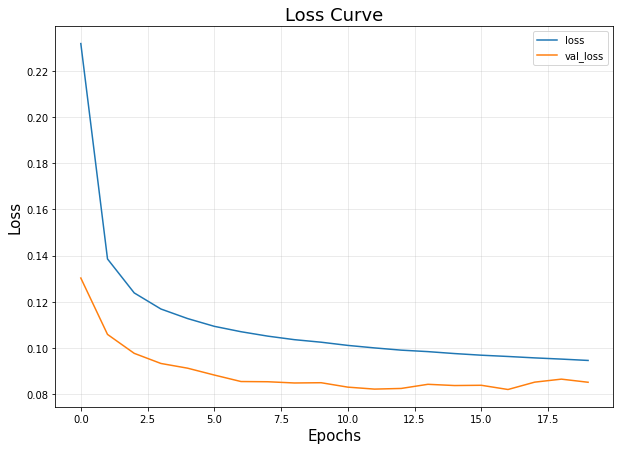

In [ ]:
f = plt.figure(figsize=(10,7))
f.add_subplot()


plt.plot(history.epoch, history.history['loss'], label = "loss") 
plt.plot(history.epoch, history.history['val_loss'], label = "val_loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()
plt.savefig("Loss_curve.png")
plt.show()

In [ ]:
test_result = autoencoder.predict(test)

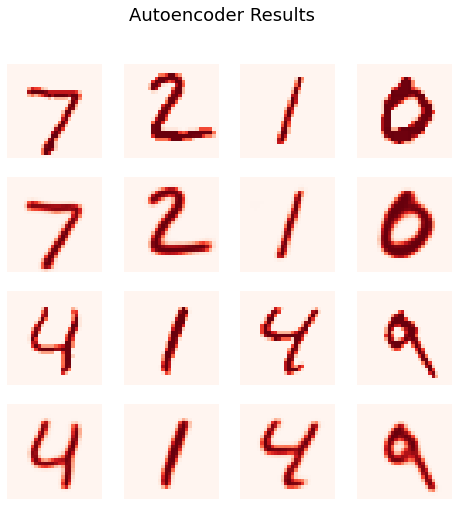

In [ ]:
rows = 2 
cols = 4 

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) 
        plt.imshow(test[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) 
        plt.imshow(test_result[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")
plt.show()

In [ ]:
# Calculation of median
def med(arr):
    arr_sort = np.sort(arr)
    median = arr_sort[len(arr)//2]
    return median






In [ ]:
img1=test[1].reshape([28,28])
img2=test_result[1].reshape([28,28])

(<matplotlib.image.AxesImage at 0x7fe6d7e0afd0>, (28, 28))

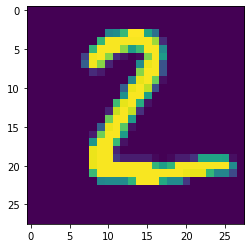

In [ ]:
plt.imshow(img1),img1.shape

(<matplotlib.image.AxesImage at 0x7fe6d7664390>, 784)

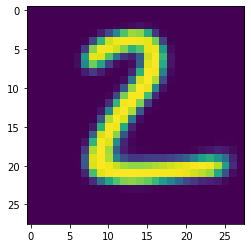

In [ ]:
plt.imshow(img2),img2.size

In [ ]:
def psnr(img1, img2):
    img1 = np.array(img1)
    img2 = np.array(img2)
    img1 = img1.astype(np.float64) / 255.
    img2 = img2.astype(np.float64) / 255.
    mse = np.mean((img1 - img2) ** 2) 
    if(mse == 0):
        return 100
    else :
        max_pixel = 1.0 
        psnr = 10 * np.log10(max_pixel /mse) 
    return psnr,mse

# computing psnr(dB)
psnr,mse=psnr(img1,img2)
print("PSNR for given image is equal to")
print(psnr) 
print("\n")
print("Mean Square Loss is equal to")
print(mse)

PSNR for given image is equal to
71.00382965899276


Mean Square Loss is equal to
7.936280956366337e-08


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
 import pickle

In [ ]:
import os

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(autoencoder,f)

INFO:tensorflow:Assets written to: ram://ea4dcc74-3560-43a4-90d5-5952956a1822/assets


In [ ]:
with open('model_pickle','rb') as f:
  auto=pickle.load(f)

In [ ]:
my_autoencoder=auto.predict(test)

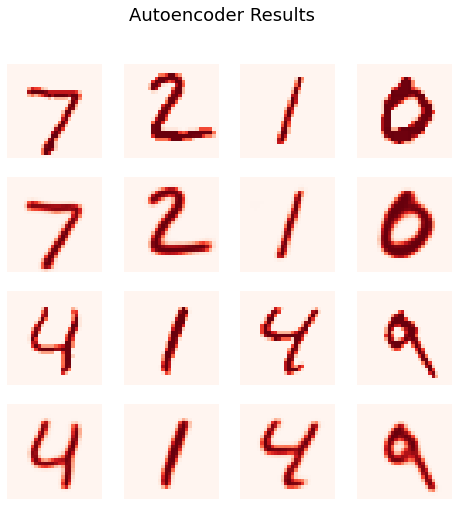

In [ ]:
rows = 2 
cols = 4 

f = plt.figure(figsize=(2*cols,2*rows*2))

for i in range(rows):
    for j in range(cols): 
        f.add_subplot(rows*2,cols, (2*i*cols)+(j+1)) 
        plt.imshow(test[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
    for j in range(cols): 
        f.add_subplot(rows*2,cols,((2*i+1)*cols)+(j+1)) 
        plt.imshow(test_result[i*cols + j].reshape([28,28]),cmap="Reds") 
        plt.axis("off")
        
f.suptitle("Autoencoder Results",fontsize=18)
plt.savefig("test_results.png")
plt.show()